In [1]:
# import important libraries
from sklearn import metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import re, nltk
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#import data
data = pd.read_csv("reviews.tsv", sep="\t")

#Show top 5 rows
data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.info()
print('Dataset shape: ', data.shape, sep="") 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
Dataset shape: (1000, 2)


In [4]:
y = data.iloc[:, -1].values

In [5]:
# Finding how many missing data are there in the dataset
total = data.isnull().sum().sort_values(ascending=False)
percent = round(((data.isnull().sum() / data.isnull().count())*100),2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Missing values', '% of Total values'])
missing_data

,Missing values,% of Total values
Liked,0,0.0
Review,0,0.0


In [6]:
# Splitting the data into test & train
train, test = train_test_split(data, test_size=0.2, random_state=0)
train_reviews = train['Review'].values  # x_train
test_reviews = test['Review'].values  # x_test
train_sentiments = train['Liked']  # y_train
test_sentiments = test['Liked']  # y_test


In [7]:
# import english stopwords
#  stop word is a commonly used word such as “the”, “a”, “an”, “in”
from nltk.corpus import stopwords
stopword_list = nltk.corpus.stopwords.words('english') 
# PorterStemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# if word is in stopword_list, remove it
def remove_stopwords(text):
    filtered_words = [ps.stem(word) for word in text if word not in stopword_list]
    filtered_text = ' '.join(filtered_words)    
    return filtered_text

# carrying out the two above functions
def normalize_corpus(corpus):
    normalized_corpus = []
    for index, text in enumerate(corpus):
        text = re.sub('[^a-zA-Z]', ' ', text)
        text = text.lower()
        text = text.split()
        text = remove_stopwords(text)
        # print(text)
        normalized_corpus.append(text)
    return normalized_corpus


In [8]:
# feature extraction  
# normalization
norm_train = normalize_corpus(train_reviews)
# the CountVectorizer builds a vocab of known words and encode them as a matrix
vectorizer = CountVectorizer(max_features = 1500)
train_features = vectorizer.fit_transform(norm_train).toarray()

In [9]:
# normalize test tweets                        
norm_test = normalize_corpus(test_reviews)  
# extract features                                     
test_features = vectorizer.transform(norm_test).toarray()

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_features, train_sentiments)

GaussianNB()

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(test_features)

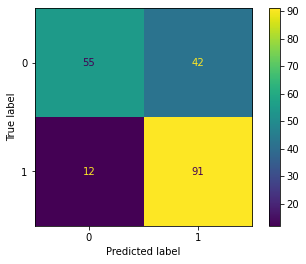

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, test_features, test_sentiments)
# This means totally 146 is correct while there are 54 incorrect predictions.

In [13]:
from sklearn.metrics import accuracy_score
print("Accuracy of classifier = " + str(accuracy_score(test_sentiments, y_pred)*100) + "%", sep="")

Accuracy of classifier = 73.0%
